
<p>
</p>
<h1><center><font color="#306998">Python Labs</font></center></h1>
<h1><center>Finite Difference</center></h1>



<center><b>Kannan Singaravelu</b></center>
<center>kannan.singaravelu@fitchlearning.com</center>



<h2 id="Finite-Difference-Methods">Finite Difference Methods<a class="anchor-link" href="#Finite-Difference-Methods">¶</a></h2><p>Finite Difference Methods (FDM) are one of the popular numerical methods used in computational finance. FDM are discretizations used for solving differential equations by approximating them with difference equations. It is one of the simplest and the oldest methods to solve differential equations. These techniques were applied to numerical applications as early as 1950s.</p>
<p>FDM are similar in approach to the (binomial) tress. However, instead of discretizing asset prices and the passage of time in a tree structure, it discretizes in a grid -  with time and price steps - by calculating the value at every possible grid points.</p>
<p><strong>Explicit, Implicit and Crank-Nicolson</strong> are the three popular approaches of FDM. The explicit methods are simple to implement, but it does not always converge and largely depends on the size of the time and asset step. Explicit methods are unstable when compared to other two methods. Finite Difference approach is peferred for low dimensional problem, usually upto 4 dimensions.</p>



<h2 id="Differentiation-Using-The-Grid">Differentiation Using The Grid<a class="anchor-link" href="#Differentiation-Using-The-Grid">¶</a></h2><p>The Binomial method contains the diffusion - the volatility - in the tree structure whereas in FDM, the <em>'tree'</em> is fixed and we change the parameters to reflect the changing diffusion. We will now define the grid by specifying the time step $\delta t$ and asset step $\delta s$ and discretize $S$ and $t$ as <br/><br/></p>
$$ S = i \delta s$$<p>and times
$$ t = T-k \delta t$$</p>
<p><em>where 0 $\leq$ i $\leq$ I and 0 $\leq$ k $\leq$ K</em></p>
<p>Here $i$ and $k$ are respective steps in the grid and we can write the value of the option at each grid points as <br/><br/></p>
$$V^{k}_{i} = ( i \delta S, T-k \delta t )$$



<h2 id="Approximating-Greeks">Approximating Greeks<a class="anchor-link" href="#Approximating-Greeks">¶</a></h2><p>The greeks terms, the Black–Scholes equation can be written as <br/><br/></p>
$$
\Theta + \frac1{2}{\sigma^2 S^2}\Gamma + r S \Delta - rV = 0
$$<p>Assume that we know the option value at each grid points, we can extract the derivatives of the option using Taylor series expansion.</p>
<h3 id="Approximating-$\Theta$">Approximating $\Theta$<a class="anchor-link" href="#Approximating-%24%5CTheta%24">¶</a></h3><p>We know that the first derivative of option as, <br/></p>
$$\frac{\partial V}{\partial t} = \underset{h \, \rightarrow \, 0}{\lim}\, \frac{V(S, t + h) - V(S, t)}{h}$$<p><br/></p>
<p>We can then approximate the time derivative from our grid using <br/></p>
$$\frac{\partial V}{\partial t} (S, t) \approx \frac{V_{i}^{k} - V_{i}^{k+1} }{\delta t}$$<h3 id="Approximating-$\Delta$">Approximating $\Delta$<a class="anchor-link" href="#Approximating-%24%5CDelta%24">¶</a></h3><p>From the lecture, we know that the central difference has much lower error when compared to forward and backward differences. Accordingly, we can approximate the first derivative of option with respect to the underlying as <br/><br/></p>
$$\frac{\partial V}{\partial S} (S, t) \approx \frac{V_{i+1}^{k} - V_{i-1}^{k} }{2 \delta S}$$<h3 id="Approximating-$\Gamma$">Approximating $\Gamma$<a class="anchor-link" href="#Approximating-%24%5CGamma%24">¶</a></h3><p>The gamma of the option is the second derivative of option with respective to the underlying and approximating it we have, <br/><br/></p>
$$\frac{\partial V^2}{\partial S^2} (S, t) \approx \frac{V_{i+1}^{k} - 2 V_{i}^{k} + V_{i-1}^{k} }{\delta S^2}$$



<h2 id="Example">Example<a class="anchor-link" href="#Example">¶</a></h2><p>Suppose that we know the value of the option on the below grid points, we can then easily evaluate the greeks as follows</p>
<p>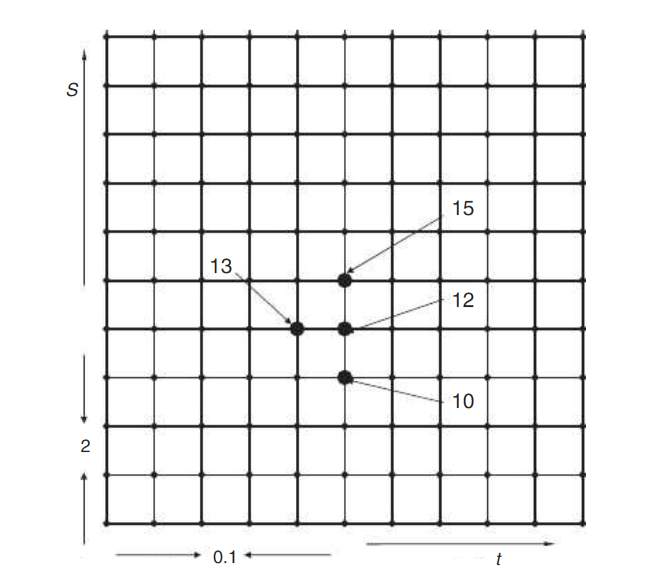</p>
<p>From the grid, we can estimate the</p>
$$\Theta = \frac{12-13}{0.1} = -10$$<p><br/></p>
$$\Delta = \frac{15-10}{2x2} = 1.25$$<p><br/></p>
$$\Gamma = \frac{15-2x12+10}{2x2} = 0.25$$<p><br/></p>
<p>Black Scholes Equation is a relationship between the option value and greeks. If we know the option value at the expiration, we can step back to get the values prior to it such that $V^i_{k} = V^i_{k-1} - \Theta * dt$. This approach is called Explicit Finite Difference Method because the relationship between the option values at time step $k$ is a simple function of the option values at time step $k-1$.</p>



<h2 id="Option-Pricing-Techniques">Option Pricing Techniques<a class="anchor-link" href="#Option-Pricing-Techniques">¶</a></h2><p>As with other option pricing techniques Explicit Finite Difference methods are used to price options using what is essentially a three step process.</p>
<p><strong>Step 1:</strong> Generate the grid by specifying grid points.<br/>
<strong>Step 2:</strong> Specify the final or initial conditions.<br/>
<strong>Step 3:</strong> Use boundary conditions to calculate option values and step back down the grid to fill it.</p>



<h3 id="European-Option">European Option<a class="anchor-link" href="#European-Option">¶</a></h3><p>To price an option, we generate a finite grid of a specified asset and time steps for a given maturity. Next, we specify the initial and boundary conditions to calculate payoff when S and T equals zero. We then step back to fill the grid with newer values derived from the earlier values.</p>



<h4 id="Import-Required-Libraries">Import Required Libraries<a class="anchor-link" href="#Import-Required-Libraries">¶</a></h4>


In [1]:

# Importing libraries
import pandas as pd
from numpy import *

import cufflinks as cf
cf.set_config_file(offline=True)

# Set max row and columns to 300
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)




<h4 id="Specify-Parameters">Specify Parameters<a class="anchor-link" href="#Specify-Parameters">¶</a></h4>


In [3]:

# Specify the parameters for FDM 
T    = 1                              # time to maturity in years
E    = 100                            # strike price
r    = .05                            # riskfree rate
vol  = .20                            # volatility
Flag = 1                              # Flag = 1 for call, -1 for puts
NAS  = 20                             # number of asset steps    I

ds   = 2* E / NAS                     # asset step size
dt   = (0.9/vol**2/NAS**2)            # time step size, for stability

NTS  = int(T / dt) + 1                # number of time steps  K
dt   = T / NTS                        # time step size [Expiration as int # of time steps away]




<h4 id="Step-1">Step 1<a class="anchor-link" href="#Step-1">¶</a></h4><p>Let's now build the grid with the above input parameters</p>


In [4]:

# Create asset steps i*ds
s = arange(0,(NAS+1)*ds,ds)
s



array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180., 190., 200.])

In [5]:

# Create time steps k*dt
t = T-arange(NTS*dt,-dt,-dt)
t



array([0.        , 0.05555556, 0.11111111, 0.16666667, 0.22222222,
       0.27777778, 0.33333333, 0.38888889, 0.44444444, 0.5       ,
       0.55555556, 0.61111111, 0.66666667, 0.72222222, 0.77777778,
       0.83333333, 0.88888889, 0.94444444, 1.        ])

In [6]:

# Verify the steps size
s.shape, t.shape



((21,), (19,))

In [7]:

# Initialize the grid with zeros
grid = zeros((len(s),len(t)))

# Subsume the grid points into a dataframe
# with asset price as index and time steps as columns
grid = pd.DataFrame(grid, index=s, columns=t)
grid



,0.000000,0.055556,0.111111,0.166667,0.222222,0.277778,0.333333,0.388889,0.444444,0.500000,0.555556,0.611111,0.666667,0.722222,0.777778,0.833333,0.888889,0.944444,1.000000
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



<h4 id="Step-2">Step 2<a class="anchor-link" href="#Step-2">¶</a></h4>


In [8]:

# Set Final or Initial condition at Expiration
if Flag == 1:
    grid.iloc[:,0] = maximum(s - E, 0)
else:
    grid.iloc[:,0] = maximum(E - s, 0)



In [9]:

grid



,0.000000,0.055556,0.111111,0.166667,0.222222,0.277778,0.333333,0.388889,0.444444,0.500000,0.555556,0.611111,0.666667,0.722222,0.777778,0.833333,0.888889,0.944444,1.000000
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



<h4 id="Step-3">Step 3<a class="anchor-link" href="#Step-3">¶</a></h4>


In [10]:

for k in range(1, len(t)):
    for i in range(1,len(s)-1):
        delta = (grid.iloc[i+1,k-1] - grid.iloc[i-1,k-1]) / (2*ds)
        gamma = (grid.iloc[i+1,k-1]-2*grid.iloc[i,k-1]+grid.iloc[i-1,k-1]) / (ds**2)
        theta = (-0.5* vol**2 * s[i]**2 * gamma) - (r*s[i]*delta) + (r*grid.iloc[i,k-1])
        
        grid.iloc[i,k] = grid.iloc[i,k-1] - (theta*dt)
    
    # Set boundary condition at S = 0
    grid.iloc[0,:] = 0 #s=0时，v都等于0
    #grid.iloc[0,k] = grid.iloc[0,k-1] * (1-r*dt) # ds = rsdt + sigma*sdx, s= 0, dv = 0 
    
    # Set boundary condition at S = infinity  # gamma = 0, so you can linearly extract
    grid.iloc[len(s)-1,k] = 2*grid.iloc[len(s)-2,k] - grid.iloc[len(s)-3,k]

# Round grid values to 4 decimals
grid = around(grid,4)



In [11]:

# Output the option values
grid




,0.000000,0.055556,0.111111,0.166667,0.222222,0.277778,0.333333,0.388889,0.444444,0.500000,0.555556,0.611111,0.666667,0.722222,0.777778,0.833333,0.888889,0.944444,1.000000
0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
10.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
20.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
30.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
40.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0001,0.0002,0.0003
50.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0002,0.0003,0.0005,0.0009,0.0014,0.0021,0.0031,0.0043,0.0059
60.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0002,0.0005,0.0013,0.0025,0.0045,0.0073,0.0113,0.0165,0.0230,0.0312,0.0410,0.0526,0.0661
70.0,0.0,0.0000,0.0000,0.0000,0.0007,0.0029,0.0078,0.0159,0.0282,0.0450,0.0668,0.0938,0.1261,0.1637,0.2068,0.2550,0.3083,0.3666,0.4296
80.0,0.0,0.0000,0.0000,0.0105,0.0366,0.0800,0.1408,0.2180,0.3103,0.4160,0.5336,0.6616,0.7988,0.9438,1.0957,1.2534,1.4162,1.5833,1.7543
90.0,0.0,0.0000,0.1281,0.3357,0.5922,0.8782,1.1817,1.4947,1.8122,2.1313,2.4497,2.7664,3.0805,3.3916,3.6996,4.0042,4.3056,4.6037,4.8985



<h4 id="Visualize-the-payoff">Visualize the payoff<a class="anchor-link" href="#Visualize-the-payoff">¶</a></h4>


In [12]:

grid.iplot(kind = 'surface', title='Call Option values by Explicit FDM')




<h3 id="Bilinear-Interpolation">Bilinear Interpolation<a class="anchor-link" href="#Bilinear-Interpolation">¶</a></h3><p>We have generated the grid and filled it with the possible option values. However, if we have to estimate option value or its derivatives on the mesh points, how can we estimate the value at points in between? The simplest way is to do a two-dimensional interpolation method called <strong>Bilinear Interpolation</strong>.</p>
<p>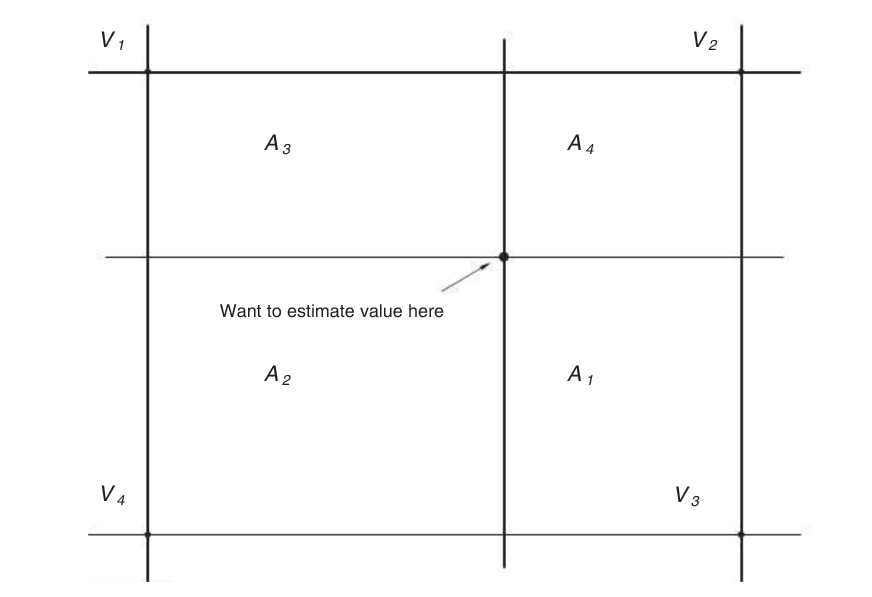</p>
<p>The option value can be estimated using the values from the nearest neighbouring values. Assume $V_1, V_2, V_3 \space and \space V_4$ are the option values from the nearest neighbour and $A_1, A_2, A_3 \space and \space A_4$ are the areas of the rectanges made by the four corners and the interior points, we can approximate the option value at the interior points as</p>
$$
\frac{\sum^4_{i=1} A_iV_i}{\sum^4_{i=1} A_i}
$$


In [13]:

def bilinear_interpolation(asset_price, ttm, df):

    # find relevant rows and columns
    col1 = df.columns[df.columns < ttm][-1]
    col2 = df.columns[df.columns >= ttm][0]
    row1 = df.index[df.index < asset_price,][-1]
    row2 = df.index[df.index >= asset_price,][0]
   
    # define points and areas
    V = [df.loc[row1, col1], df.loc[row1, col2],
           df.loc[row2, col2], df.loc[row2, col1]]
                      
    A = [(row2 - asset_price) * (col2 - ttm),
           (row2 - asset_price) * (ttm - col1),
           (asset_price - row1) * (ttm - col1),
           (asset_price - row1) * (col2 - ttm)]
   
    # interpolate values
    return sum(array(V)*array(A))/sum(array(A))



In [14]:

# Option value, approximated
bilinear_interpolation(105,0.3,grid)



8.476349999999998

In [15]:

# Column 1
grid.columns[grid.columns < 0.3]



Float64Index([                0.0, 0.05555555555555558, 0.11111111111111116,
              0.16666666666666674, 0.22222222222222232,  0.2777777777777779],
             dtype='float64')

In [16]:

col1 = grid.columns[grid.columns < 0.3][-1]
col1



0.2777777777777779

In [17]:

# Column 2
grid.columns[grid.columns >= 0.3]



Float64Index([ 0.3333333333333335, 0.38888888888888906, 0.44444444444444464,
               0.5000000000000002,  0.5555555555555558,  0.6111111111111114,
                0.666666666666667,  0.7222222222222225,  0.7777777777777781,
               0.8333333333333337,  0.8888888888888893,  0.9444444444444449,
               1.0000000000000004],
             dtype='float64')

In [18]:

col2 = grid.columns[grid.columns >= 0.3][0]
col2



0.3333333333333335

In [19]:

# Row 1
grid.index[grid.index < 110]



Float64Index([0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0,
              100.0],
             dtype='float64')

In [20]:

row1 = grid.index[grid.index < 110][-1]
row1



100.0

In [21]:

# Row 2
grid.index[grid.index >= 110]



Float64Index([110.0, 120.0, 130.0, 140.0, 150.0, 160.0, 170.0, 180.0, 190.0,
              200.0],
             dtype='float64')

In [22]:

row2 = grid.index[grid.index >= 110][0]
row2



110.0

In [23]:

# Nearest neighbours grid points
[row1,col1], [row1, col2], [row2, col2], [row2, col1]



([100.0, 0.2777777777777779],
 [100.0, 0.3333333333333335],
 [110.0, 0.3333333333333335],
 [110.0, 0.2777777777777779])

In [24]:

V = [grid.loc[row1,col1], grid.loc[row1,col2], grid.loc[row2, col2], grid.loc[row2, col1]]

V



[4.4659, 5.0543, 12.5347, 12.0626]

In [25]:

# Areas of the rectangle made by four corners and interior points
A = [(row2-105) * (col2-0.3),
     (row2-105) * (0.3-col1),
     (105-row1) * (0.3-col1),
     (105-row1) * (col2-0.3)]

A



[0.16666666666666746,
 0.11111111111111044,
 0.11111111111111044,
 0.16666666666666746]

In [26]:

# Option value in mesh points, approximated
sum(array(V)*array(A))/sum(array(A))



8.476349999999998


<h2 id="User-Defined-Function">User Defined Function<a class="anchor-link" href="#User-Defined-Function">¶</a></h2>


In [27]:

def efdm_grid(Strike, Volatility, Rate, TTM, NAS, Flag=1):
    
    # Specify Flag as 1 for calls and -1 for puts
    
    ds = 2*Strike/NAS                   # asset step size
    dt = 0.9/Volatility**2/NAS**2       # for stability
    
    NTS = int(TTM / dt) + 1             # time step size, alternatively use fixed size 10 on stability issue 
    dt = TTM/NTS                        # time step
    
    s = arange(0,(NAS+1)*ds,ds)
    t = TTM-arange(NTS*dt,-dt,-dt)
    
    # Initialize the grid with zeros
    grid = zeros((len(s),len(t)))
    grid = pd.DataFrame(grid, index=s, columns=t)
    
    # Set boundary condition at Expiration
    grid.iloc[:,0] = maximum(Flag * (s - Strike), 0)
        
    for k in range(1, len(t)):
        for i in range(1,len(s)-1):
            delta = (grid.iloc[i+1,k-1] - grid.iloc[i-1,k-1]) / (2*ds)
            gamma = (grid.iloc[i+1,k-1]-2*grid.iloc[i,k-1]+grid.iloc[i-1,k-1]) / (ds**2)
            theta = (-0.5* vol**2 * s[i]**2 * gamma) - (r*s[i]*delta) + (r*grid.iloc[i,k-1])

            grid.iloc[i,k] = grid.iloc[i,k-1] - dt*theta
    
        # Set boundary condition at S = 0
        grid.iloc[0,k] = grid.iloc[0,k-1] * (1-r*dt)

        # Set boundary condition at S = infinity
        grid.iloc[len(s)-1,k] = abs(2*(grid.iloc[len(s)-2,k]) - grid.iloc[len(s)-3,k])
            
    # round grid values to 4 decimals
    return around(grid,4)



In [28]:

# Call the function for put option
fdm_puts = efdm_grid(100,0.2,0.05,1,40,Flag=-1)
fdm_puts



,0.000000,0.013889,0.027778,0.041667,0.055556,0.069444,0.083333,0.097222,0.111111,0.125000,0.138889,0.152778,0.166667,0.180556,0.194444,0.208333,0.222222,0.236111,0.250000,0.263889,0.277778,0.291667,0.305556,0.319444,0.333333,0.347222,0.361111,0.375000,0.388889,0.402778,0.416667,0.430556,0.444444,0.458333,0.472222,0.486111,0.500000,0.513889,0.527778,0.541667,0.555556,0.569444,0.583333,0.597222,0.611111,0.625000,0.638889,0.652778,0.666667,0.680556,0.694444,0.708333,0.722222,0.736111,0.750000,0.763889,0.777778,0.791667,0.805556,0.819444,0.833333,0.847222,0.861111,0.875000,0.888889,0.902778,0.916667,0.930556,0.944444,0.958333,0.972222,0.986111,1.000000
0.0,100.0,99.9306,99.8612,99.7918,99.7225,99.6533,99.5841,99.5149,99.4458,99.3767,99.3077,99.2388,99.1698,99.1010,99.0322,98.9634,98.8947,98.8260,98.7574,98.6888,98.6202,98.5517,98.4833,98.4149,98.3466,98.2783,98.2100,98.1418,98.0737,98.0056,97.9375,97.8695,97.8015,97.7336,97.6657,97.5979,97.5301,97.4624,97.3947,97.3271,97.2595,97.1920,97.1245,97.0570,96.9896,96.9223,96.8550,96.7877,96.7205,96.6533,96.5862,96.5191,96.4521,96.3851,96.3182,96.2513,96.1845,96.1177,96.0509,95.9842,95.9176,95.8509,95.7844,95.7179,95.6514,95.5850,95.5186,95.4523,95.3860,95.3197,95.2535,95.1874,95.1213
5.0,95.0,94.9306,94.8612,94.7918,94.7225,94.6533,94.5841,94.5149,94.4458,94.3767,94.3077,94.2388,94.1698,94.1010,94.0322,93.9634,93.8947,93.8260,93.7574,93.6888,93.6202,93.5517,93.4833,93.4149,93.3466,93.2783,93.2100,93.1418,93.0737,93.0056,92.9375,92.8695,92.8015,92.7336,92.6657,92.5979,92.5301,92.4624,92.3947,92.3271,92.2595,92.1920,92.1245,92.0570,91.9896,91.9223,91.8550,91.7877,91.7205,91.6533,91.5862,91.5191,91.4521,91.3851,91.3182,91.2513,91.1845,91.1177,91.0509,90.9842,90.9176,90.8509,90.7844,90.7179,90.6514,90.5850,90.5186,90.4523,90.3860,90.3197,90.2535,90.1874,90.1213
10.0,90.0,89.9306,89.8612,89.7918,89.7225,89.6533,89.5841,89.5149,89.4458,89.3767,89.3077,89.2388,89.1698,89.1010,89.0322,88.9634,88.8947,88.8260,88.7574,88.6888,88.6202,88.5517,88.4833,88.4149,88.3466,88.2783,88.2100,88.1418,88.0737,88.0056,87.9375,87.8695,87.8015,87.7336,87.6657,87.5979,87.5301,87.4624,87.3947,87.3271,87.2595,87.1920,87.1245,87.0570,86.9896,86.9223,86.8550,86.7877,86.7205,86.6533,86.5862,86.5191,86.4521,86.3851,86.3182,86.2513,86.1845,86.1177,86.0509,85.9842,85.9176,85.8509,85.7844,85.7179,85.6514,85.5850,85.5186,85.4523,85.3860,85.3197,85.2535,85.1874,85.1213
15.0,85.0,84.9306,84.8612,84.7918,84.7225,84.6533,84.5841,84.5149,84.4458,84.3767,84.3077,84.2388,84.1698,84.1010,84.0322,83.9634,83.8947,83.8260,83.7574,83.6888,83.6202,83.5517,83.4833,83.4149,83.3466,83.2783,83.2100,83.1418,83.0737,83.0056,82.9375,82.8695,82.8015,82.7336,82.6657,82.5979,82.5301,82.4624,82.3947,82.3271,82.2595,82.1920,82.1245,82.0570,81.9896,81.9223,81.8550,81.7877,81.7205,81.6533,81.5862,81.5191,81.4521,81.3851,81.3182,81.2513,81.1845,81.1177,81.0509,80.9842,80.9176,80.8509,80.7844,80.7179,80.6514,80.5850,80.5186,80.4523,80.3860,80.3197,80.2535,80.1874,80.1213
20.0,80.0,79.9306,79.8612,79.7918,79.7225,79.6533,79.5841,79.5149,79.4458,79.3767,79.3077,79.2388,79.1698,79.1010,79.0322,78.9634,78.8947,78.8260,78.7574,78.6888,78.6202,78.5517,78.4833,78.4149,78.3466,78.2783,78.2100,78.1418,78.0737,78.0056,77.9375,77.8695,77.8015,77.7336,77.6657,77.5979,77.5301,77.4624,77.3947,77.3271,77.2595,77.1920,77.1245,77.0570,76.9896,76.9223,76.8550,76.7877,76.7205,76.6533,76.5862,76.5191,76.4521,76.3851,76.3182,76.2513,76.1845,76.1177,76.0509,75.9842,75.9176,75.8509,75.7844,75.7179,75.6514,75.5850,75.5186,75.4523,75.3860,75.3197,75.2535,75.1874,75.1213
25.0,75.0,74.9306,74.8612,74.7918,74.7225,74.6533,74.5841,74.5149,74.4458,74.3767,74.3077,74.2388,74.1698,74.1010,74.0322,73.9634,73.8947,73.8260,73.7574,73.6888,73.6202,73.5517,73.4833,73.4149,73.3466,73.2783,73.2100,73.1418,73.0737,73.0056,72.9375,72.8695,72.8015,72.7336,72.6657,72.5979,72.5301,72.4624,72.3947,72.3271,72.2595,72.1920,72.1245,72.0570,71.9896,71.9223,71.8550,71.7877,71.7205,71.6533,71.5862,71.

In [29]:

# Visualize the plot for put option
fdm_puts.iplot(kind='surface', title='Put Option values by Explicit FDM')




<h2 id="References">References<a class="anchor-link" href="#References">¶</a></h2><ul>
<li>Python resources <a href="https://urldefense.com/v3/__https://github.com/kannansingaravelu/PythonResources__;!!KGvANbslH1YjwA!sw7x4VwgMRSBW277aQLwGsOlI2rwBuHjiBsm6Zfp-tYSlKixZCcdtyDEFWbWYGH5KlsExgSSWg$">https://github.com/kannansingaravelu/PythonResources</a></li>
<li>Paul Wilmott (2007), Paul Wilmott introduces Quantitative Finance</li>
</ul>



<p>Kannan Singaravelu | <a href="https://urldefense.com/v3/__https://github.com/kannansingaravelu__;!!KGvANbslH1YjwA!sw7x4VwgMRSBW277aQLwGsOlI2rwBuHjiBsm6Zfp-tYSlKixZCcdtyDEFWbWYGH5Kltn8uyZGg$">https://github.com/kannansingaravelu</a> | Certificate in Quantitative Finance, June 2020</p>
